# Train a model

## Installation

In [1]:
%%bash

pip install graph-pes | tail -n 1

We now should have access to the ``graph-pes-train`` command. We can check this by running:

In [1]:
%%bash

graph-pes-train -h

usage: graph-pes-train [-h] [args [args ...]]

Train a GraphPES model using PyTorch Lightning.

positional arguments:
  args        Config files and command line specifications. Config files
              should be YAML (.yaml/.yml) files. Command line specifications
              should be in the form nested^key=value. Final config is built up
              from these items in a left to right manner, with later items
              taking precedence over earlier ones in the case of conflicts.

optional arguments:
  -h, --help  show this help message and exit

Copyright 2023-24, John Gardner


## Data definition

We use [load-atoms](https://jla-gardner.github.io/load-atoms/) to download and split the QM7 dataset into training, validation and test datasets:

In [5]:
import ase.io
from load_atoms import load_dataset

structures = load_dataset("QM7")
train, val, test = structures.random_split([0.8, 0.1, 0.1])

ase.io.write("train.xyz", train)
ase.io.write("val.xyz", val)
ase.io.write("test.xyz", test)

Output()

## Configuration

In [ ]:
!wget https://raw.githubusercontent.com/jla-gardner/graph-pes/refs/heads/main/docs/source/quickstart/quickstart-config.yaml

## Let's train


You can see the output of this training process in this [Weights and Biases dashboard](https://wandb.ai/jla-gardner/graph-pes-demo/runs/qm7-quickstart).



In [1]:
!graph-pes-train quickstart-config.yaml

Seed set to 42


[graph-pes INFO]: Set logging level to INFO
[graph-pes INFO]: Started training at 2024-10-14 15:17:10.323
[graph-pes INFO]: Output directory: graph-pes-results/qm7-quickstart
[graph-pes INFO]: 
Logging using WandbLogger(
  project="graph-pes-demo",
  id="qm7-quickstart",
  save_dir="graph-pes-results"
)



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: jla-gardner. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.17.1
wandb: Run data is saved locally in graph-pes-results/wandb/run-20241014_151711-qm7-quickstart
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run qm7-quickstart
wandb: ⭐️ View project at https://wandb.ai/jla-gardner/graph-pes-demo
wandb: 🚀 View run at https://wandb.ai/jla-gardner/graph-pes-demo/runs/qm7-quickstart


[graph-pes INFO]: Logging to graph-pes-results/qm7-quickstart/logs/rank-0.log
[graph-pes INFO]: 
model:
   graph_pes.models.PaiNN:
      layers: 3
      cutoff: 3.0
data:
   train:
      graph_pes.data.file_dataset:
         path: train.xyz
         cutoff: 3.0
         n: 1000
         shuffle: false
   valid:
      graph_pes.data.file_dataset:
         path: val.xyz
         cutoff: 3.0
loss: graph_pes.training.loss.PerAtomEnergyLoss()
fitting:
   pre_fit_model: true
   max_n_pre_fit: 5000
   early_stopping_patience: null
   trainer_kwargs:
      max_epochs: 100
      accelerator: auto
      enable_model_summary: false
   loader_kwargs:
      num_workers: 0
      persistent_workers: false
      batch_size: 16
      pin_memory: false
   optimizer:
      graph_pes.training.opt.Optimizer:
         name: AdamW
         lr: 0.0001
   scheduler: null
   swa: null
general:
   seed: 42
   root_dir: graph-pes-results
   run_id: qm7-quickstart
   log_level: INFO
   progress: logged
wandb:
   p

   epoch   valid/loss/total   valid/loss/per_atom_energy_mae_component   timer/its_per_s/train   timer/its_per_s/valid
       0            4.08090                                    4.08090                76.92308               207.77777
       1            2.62973                                    2.62973                83.33334               207.03702
       2            0.48820                                    0.48820                83.33334               202.22223
       3            0.33228                                    0.33228                90.90909               210.37036
       4            0.25786                                    0.25786                90.90909               207.77777
       5            0.20465                                    0.20465                90.90909               214.44444
       6            0.16524                                    0.16524                83.33334               208.51851
       7            0.12828                     

`Trainer.fit` stopped: `max_epochs=100` reached.


[graph-pes INFO]: Loading best weights from "graph-pes-results/qm7-quickstart/checkpoints/best.ckpt"
[graph-pes INFO]: Training complete.
[graph-pes INFO]: Model saved to graph-pes-results/qm7-quickstart/model.pt
[graph-pes INFO]: Deploying model for use with LAMMPS to graph-pes-results/qm7-quickstart/lammps_model.pt


wandb: \ 0.033 MB of 0.033 MB uploaded
wandb: Run history:
wandb:                                    epoch ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
wandb:                   lr-AdamW/non-decayable ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                          lr-AdamW/normal ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                   n_learnable_parameters ▁
wandb:                             n_parameters ▁
wandb:                    timer/its_per_s/train ▄▄▄█▄▄▄▄█▁█▄█▄█▄█▄▄▁█▄██▄█▁█████▄▄█▄▄█▄█
wandb:                    timer/its_per_s/valid ▄▁▇▆▄█▄▆▅█▄▄▅▃▅▄▆▁▄▂▆▄▄▇▅▆▂▄▄▅▄▃▅▄▄▅▃▃▅▃
wandb:             timer/step_duration_ms/train ▅▅▅▁▅▅▅▅▁█▁▅▁▅▁▅▁▅▅█▁▅▁▁▅▁█▁▁▁▁▁▅▅▁▅▅▁▅▁
wandb:             timer/step_duration_ms/valid ▄█▁▂▅▁▄▃▄▁▅▄▄▅▄▄▃█▄▇▂▄▄▂▄▃▇▄▄▄▄▆▄▅▄▄▅▆▄▅
wandb: train/loss/per_atom_energy_mae_component █▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                         train/loss/total █▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:        train/metrics/per_atom_ene

In [3]:
from graph_pes.models import load_model

best_model = load_model("graph-pes-results/qm7-quickstart/model.pt")
best_model


PaiNN(
  (z_embedding): PerElementEmbedding(
    dim=32,
    elements=['H', 'C', 'N', 'O', 'S']
  )
  (interactions): UniformModuleList(
    (0-2): 3 x Interaction(
      (filter_generator): HaddamardProduct(
        (components): ModuleList(
          (0): Sequential(
            (0): Bessel(n_features=20, cutoff=3.0, trainable=True)
            (1): Linear(in_features=20, out_features=96, bias=True)
          )
          (1): PolynomialEnvelope(cutoff=3.0, p=6)
        )
      )
      (Phi): MLP(32 → 32 → 96, activation=SiLU())
    )
  )
  (updates): UniformModuleList(
    (0-2): 3 x Update(
      (U): VectorLinear(
        (_linear): Linear(in_features=32, out_features=32, bias=False)
      )
      (V): VectorLinear(
        (_linear): Linear(in_features=32, out_features=32, bias=False)
      )
      (mlp): MLP(64 → 32 → 96, activation=SiLU())
    )
  )
  (read_out): MLP(32 → 32 → 1, activation=SiLU())
)

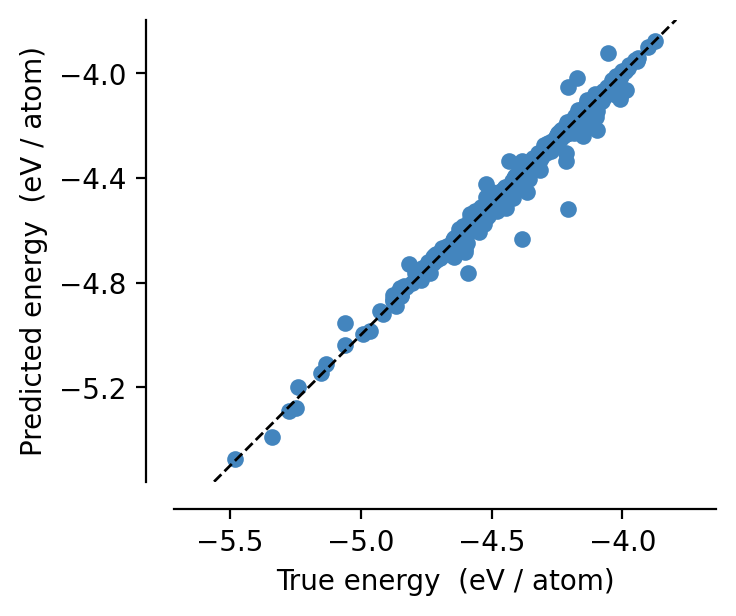

In [6]:
from graph_pes.analysis import parity_plot
from graph_pes.data.io import to_atomic_graphs
from graph_pes.transform import divide_per_atom

%config InlineBackend.figure_format = 'retina'

test_graphs = to_atomic_graphs(test, cutoff=3.0)

parity_plot(
    best_model,
    test_graphs,
    property="energy",
    transform=divide_per_atom,
    units="eV / atom",
)